## Objetivo deste Notebook

Este notebook tem como objetivos, implementar e ajustar um modelo cinético clássico, estimar parâmetros físico-químicos, avaliar a qualidade do ajuste aos dados experimentais de forma a servir como baseline interpretável para comparação com ML.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("../data/raw/mancozebe_experimental.csv")

## Modelo Cinético de Primeira Ordem [C(t) = C0 * e^(-k * t)]
Assume-se cinética de primeira ordem, frequentemente aplicada à degradação de pesticidas em solo, onde a taxa de degradação é proporcional à concentração remanescente.

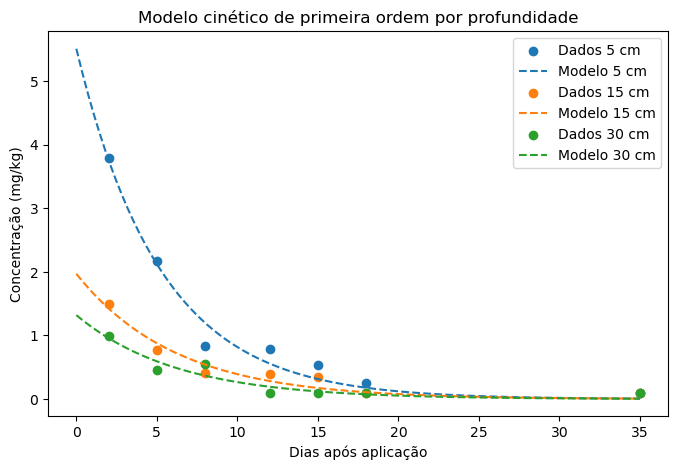

,profundidade_cm,C0,k,meia_vida_dias,RMSE,MAE
0,5,5.512902,0.190830,3.632285,0.188240,0.150410
1,15,1.970948,0.161677,4.287226,0.110317,0.099345
2,30,1.320330,0.160011,4.331871,0.100748,0.083107


In [3]:
# Função do modelo cinético
def first_order_kinetics(t, C0, k):
    return C0 * np.exp(-k * t)

# Profundidades únicas
depths = df["profundidade_cm"].unique()

results = []

plt.figure(figsize=(8, 5))

for depth in depths:
    data_depth = df[df["profundidade_cm"] == depth]
    
    t = data_depth["dias"].values
    C = data_depth["concentracao_mg_kg"].values

    # Ajuste do modelo
    popt, _ = curve_fit(
        first_order_kinetics,
        t,
        C,
        bounds=(0, np.inf)
    )
    
    C0, k = popt
    C_pred = first_order_kinetics(t, C0, k)

    # Métricas
    rmse = np.sqrt(mean_squared_error(C, C_pred))
    mae = mean_absolute_error(C, C_pred)
    half_life = np.log(2) / k if k > 0 else np.nan

    results.append({
        "profundidade_cm": depth,
        "C0": C0,
        "k": k,
        "meia_vida_dias": half_life,
        "RMSE": rmse,
        "MAE": mae
    })

    # Plot
    t_smooth = np.linspace(0, max(t), 100)
    plt.scatter(t, C, label=f'Dados {depth} cm')
    plt.plot(
        t_smooth,
        first_order_kinetics(t_smooth, C0, k),
        linestyle='--',
        label=f'Modelo {depth} cm'
    )

plt.xlabel("Dias após aplicação")
plt.ylabel("Concentração (mg/kg)")
plt.legend()
plt.title("Modelo cinético de primeira ordem por profundidade")
plt.show()

# Resultados em DataFrame
df_kinetics = pd.DataFrame(results)
df_kinetics

#### Insight
O modelo cinético de primeira ordem apresentou bom desempenho em todas as profundidades, evidenciando que o modelo reproduz adequadamente a tendência média observada.

O ajuste foi realizado considerando todos os dados experimentais de forma conjunta, assumindo uma constante cinética média representativa do sistema como um todo. O erro reflete tanto a variabilidade experimental quanto as limitações da hipótese de cinética de primeira ordem.